# **Machine Learning Project**

In [4]:
# =============================
# 📦 Installation des dépendances (à exécuter une seule fois)
# =============================
!pip install --upgrade --force-reinstall numpy pandas scipy scikit-learn gensim transformers nltk seaborn matplotlib


  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.5.0 requires fsspec[http]<=2024.12.0,>=2023.1.0, but you have fsspec 2025.9.0 which is incompatible.
s3fs 2024.6.1 requires fsspec==2024.6.1.*, but you have fsspec 2025.9.0 which is incompatible.
streamlit 1.37.1 requires packaging<25,>=20, but you have packaging 25.0 which is incompatible.
streamlit 1.37.1 requires pillow<11,>=7.1.0, but you have pillow 11.3.0 which 


  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scipy-1.16.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
  Using cached transformers-4.56.2-py3-none-any.whl.metadata (40 kB)
  Using cached nltk-3.9.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached numpy

In [5]:
# =============================
# 📚 Imports
# =============================

# Standard
import re
import time
import warnings

# NumPy & Pandas
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import nltk


nltk.download('punkt_tab')
nltk.download('punkt')                     # tokenisation
nltk.download('stopwords')                 # stopwords
nltk.download('wordnet')                   # lemmatisation
nltk.download('averaged_perceptron_tagger') # POS tagging
nltk.download('averaged_perceptron_tagger_eng')

# Machine learning - sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    roc_curve
)

# Embeddings
from gensim.models import Word2Vec

# Transformers (Hugging Face)
from transformers import pipeline

# SciPy utilitaire
from scipy.sparse import hstack

# =============================
# 🔽 Téléchargement des ressources NLTK nécessaires
# =============================
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gboyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gboyo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gboyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gboyo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gboyo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\gboyo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_pe

True

In [6]:
data = pd.read_csv("train.csv", engine="python", encoding='latin1',on_bad_lines='skip')
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


# PART 0 : Pre-processing

In [8]:
# ----- Étape 1 : Nettoyage de texte (suppression des caractères spéciaux)
def clean_text_for_tokens(text):
    """Nettoie le texte pour la tokenisation."""
    if pd.isna(text):
        return ""

    # Supprime les caractères spéciaux à l'exception des ponctuations
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
# Appliquer la fonction de nettoyage
data['cleaned_text'] = data['comment_text'].apply(clean_text_for_tokens)

In [9]:
data['cleaned_lower_text'] = data['cleaned_text'].astype(str).str.lower()

In [10]:
# --- Étape 2 : Tokenisation ---
# La mise en minuscules et le nettoyage sont déjà faits dans 'cleaned_text',
# nous n'avons plus qu'à tokeniser cette colonne.
data['tokens'] = data['cleaned_lower_text'].apply(lambda x: word_tokenize(x))

In [11]:
# --- Étape 3 : Suppression des Stopwords
stop_words = set(stopwords.words('english'))
stop_words -= {"not", "no", "nor", "n't", "you", "your", "yours", "me", "my", "mine", "we", "us"}
# Applique la suppression des mots vides à la colonne 'tokens'
data['tokens_nostop'] = data['tokens'].apply(
    lambda toks: [t for t in toks if t not in stop_words]
)


In [12]:
#--- Étape 4 : Lemmatisation

#Initialiser le lemmatiseur
lemmatizer = WordNetLemmatizer()
# Fonction pour obtenir le tag WordNet (nécessaire pour la lemmatisation)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Applique la lemmatisation sur les tokens sans stoppwords
def lemmatize_tokens(tokens):
    # Taggage grammatical des mots
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_list = []
    for token, tag in tagged_tokens:
        wordnet_tag = get_wordnet_pos(tag)
        lemmatized_list.append(lemmatizer.lemmatize(token, wordnet_tag))
    return lemmatized_list

data['tokens_lemmatized'] = data['tokens_nostop'].apply(lemmatize_tokens)

In [13]:
def tokens_to_text(x):  
    # x peut être une liste de tokens, une chaîne, ou NaN  
    if isinstance(x, list):  
        return " ".join(map(str, x))  
    if pd.isna(x):  
        return ""  
    return str(x)  
  
# Créer la nouvelle colonne à partir de tokens_lemmatized  
data = data.copy()  
data["comment_lemmatized"] = data["tokens_lemmatized"].apply(tokens_to_text)  
  
# Optionnel: retirer les lignes vides après conversion  
data = data[data["comment_lemmatized"].str.strip() != ""]  
  

In [14]:
# Affiche un aperçu des colonnes finales
print(data[['cleaned_text', 'tokens_nostop', 'tokens_lemmatized',  "comment_lemmatized", 'toxic']].head())

                                        cleaned_text  \
0  Explanation Why the edits made under my userna...   
1  D aww He matches this background colour I m se...   
2  Hey man I m really not trying to edit war It s...   
3  More I can t make any real suggestions on impr...   
4  You sir are my hero Any chance you remember wh...   

                                       tokens_nostop  \
0  [explanation, edits, made, my, username, hardc...   
1  [aww, matches, background, colour, seemingly, ...   
2  [hey, man, really, not, trying, edit, war, guy...   
3  [make, real, suggestions, improvement, wondere...   
4  [you, sir, my, hero, chance, you, remember, page]   

                                   tokens_lemmatized  \
0  [explanation, edits, make, my, username, hardc...   
1  [aww, match, background, colour, seemingly, st...   
2  [hey, man, really, not, try, edit, war, guy, c...   
3  [make, real, suggestion, improvement, wonder, ...   
4  [you, sir, my, hero, chance, you, remember,

# PART 1: WORD EMBEDDINGS (pretrained word embeddings GloVe)

In [32]:
import time
import numpy as np

import gensim.downloader as api
emb = api.load("glove-wiki-gigaword-300")
start_time = time.time()

# 1) Charger GloVe depuis le hub gensim (téléchargement auto la 1ère fois)
print("Loading GloVe (glove-wiki-gigaword-300)…")
emb = api.load("glove-wiki-gigaword-300")  # 300d
D = emb.vector_size
print(f"Loaded. Dim = {D}")

# 2) Textes et labels
texts = data["comment_lemmatized"].astype(str).tolist()
y = data["toxic"].astype(int).values

# 3) Tokenisation simple (lower + split) puis doc embedding = moyenne des embeddings GloVe connus
def doc_vec(text):
    tokens = text.lower().split()
    vecs = [emb[w] for w in tokens if w in emb]
    return np.mean(vecs, axis=0) if vecs else np.zeros(D, dtype=np.float32)

X = np.vstack([doc_vec(t) for t in texts])

# 4) Split + entraînement
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf = LogisticRegression(max_iter=2000, class_weight='balanced')
clf.fit(X_train, y_train)

# 5) Évaluation
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
y_prob_embed = y_prob

print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=["NEG","POS"], digits=4))
print("AUC:", f"{roc_auc_score(y_test, y_prob):.4f}")
print(f"\nTotal runtime: {time.time() - start_time:.2f} s")

Loading GloVe (glove-wiki-gigaword-300)…
Loaded. Dim = 300

Classification report:
              precision    recall  f1-score   support

         NEG     0.9839    0.8923    0.9358     28853
         POS     0.4590    0.8620    0.5990      3059

    accuracy                         0.8894     31912
   macro avg     0.7214    0.8772    0.7674     31912
weighted avg     0.9336    0.8894    0.9036     31912

AUC: 0.9478

Total runtime: 186.76 s


# PART 2: TRANSFORMERS

In [20]:
from transformers import pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import time

# 1) Préparer la colonne texte en list[str]
def prepare_text(series: pd.Series):
    s = series.astype(str).str.strip()
    s = s.replace({"nan": np.nan, "None": np.nan})
    s = s.dropna()
    s = s[s != ""]
    return s.tolist()

start = time.time()

# Supposez que 'data' a les colonnes 'cleaned_text' et 'toxic' (0/1)
X_all = prepare_text(data['cleaned_text'])
# Aligner y sur X_all après nettoyage
data_clean = data.loc[data['cleaned_text'].astype(str).str.strip().replace({"nan": np.nan, "None": np.nan}).notna()]
data_clean = data_clean[data_clean['cleaned_text'].astype(str).str.strip() != ""]
y_all = data_clean['toxic'].astype(int).values

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# 3) Modèle adapté à la toxicité (bien mieux que SST-2 sentiment)
model_name = "unitary/toxic-bert"  # ou "martin-ha/toxic-comment-model", "SkolkovoInstitute/roberta_toxicity_classifier"
clf = pipeline(
    "text-classification",
    model=model_name,
    tokenizer=model_name,
    return_all_scores=True,
    truncation=True
)

# 4) Prédiction avec mapping d'étiquettes robuste et batching
def predict_proba(texts, batch_size=64):
    y_pred, y_score = [], []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]  # list[str] obligatoire
        outputs = clf(batch)
        for out in outputs:
            # out peut être un dict (binaire) ou une liste (multi-label)
            if isinstance(out, dict) and "label" in out:
                # Binaire avec un seul score + label
                label = out["label"].lower()
                score = float(out["score"])
                p_toxic = score if "toxic" in label else 1.0 - score
            else:
                # Liste de labels: chercher 'toxic'
                d = {o["label"].lower(): float(o["score"]) for o in out}
                if "toxic" in d:
                    p_toxic = d["toxic"]
                else:
                    # fallback: prendre le max comme approximation
                    p_toxic = max(d.values()) if d else 0.0
            y_score.append(p_toxic)
            y_pred.append(1 if p_toxic >= 0.5 else 0)
    return np.array(y_pred), np.array(y_score)

y_pred, y_score = predict_proba(X_test, batch_size=64)


# 5) Évaluation
print("Transformers - classification report")
print(classification_report(y_test, y_pred, target_names=["non-toxic", "toxic"]))
print("AUC:", roc_auc_score(y_test, y_score))

print(f"Temps d'exécution total: {time.time() - start:.2f} secondes")

Device set to use cpu
C:\Users\gboyo\anaconda3\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Transformers - classification report
              precision    recall  f1-score   support

   non-toxic       0.99      0.99      0.99     28853
       toxic       0.89      0.92      0.90      3059

    accuracy                           0.98     31912
   macro avg       0.94      0.95      0.95     31912
weighted avg       0.98      0.98      0.98     31912

AUC: 0.9955225690182519
Temps d'exécution total: 2776.53 secondes


# PART 3 : PROMPT ENGENEERING

In [22]:
from transformers import pipeline
import pandas as pd
import numpy as np
import time
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    roc_auc_score,
)

# 1) Pipeline Hugging Face
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# 2) Préparation des données
def to_text(x):
    if isinstance(x, list):
        return " ".join(map(str, x))
    if pd.isna(x):
        return ""
    return str(x)

df = data.copy()
df = df[['comment_lemmatized', 'toxic']].dropna()
df['text'] = df['comment_lemmatized'].apply(to_text)
df = df[df['text'].str.strip() != ""]  # enlever lignes vides

# Échantillon (modifiez n)
n = 100  # ex: 100 pour des métriques plus stables
df_sample = df.sample(min(n, len(df)), random_state=42).reset_index(drop=True)

labels = ["toxic", "non-toxic"]
map_to_int = {"toxic": 1, "non-toxic": 0}

def get_top_label(pred):
    if isinstance(pred, list):
        pred = pred[0]
    return pred["labels"][0]

def get_score_for_label(pred, label="toxic"):
    """
    Retourne le score associé à 'label' (ex: 'toxic') à partir de la sortie du pipeline.
    """
    if isinstance(pred, list):
        pred = pred[0]
    labels_list = pred["labels"]
    scores_list = pred["scores"]
    # Le pipeline ordonne labels et scores par probabilité décroissante
    # On récupère l'index du label désiré
    try:
        idx = labels_list.index(label)
        return float(scores_list[idx])
    except ValueError:
        # label non trouvé (rare), on renvoie NaN
        return np.nan

# 3) Prédictions + temps + scores continus pour AUC

# 3.1 Zero-shot direct
t0 = time.time()
zero_preds_str = []
zero_scores_pos = []  # score proba pour "toxic" (classe positive)
for text in df_sample['text']:
    pred = classifier(text, candidate_labels=labels)
    zero_preds_str.append(get_top_label(pred))
    zero_scores_pos.append(get_score_for_label(pred, label="toxic"))
time_zero = time.time() - t0


# 3.2 Role prompting
def role_prompt(comment):
    return f"You are a moderator. Classify the following comment as toxic or non-toxic:\n\n{comment}"

t0 = time.time()
role_preds_str = []
role_scores_pos = []
for text in df_sample['text']:
    prompt = role_prompt(text)
    pred = classifier(prompt, candidate_labels=labels)
    role_preds_str.append(get_top_label(pred))
    role_scores_pos.append(get_score_for_label(pred, label="toxic"))
time_role = time.time() - t0



# 3.3 Few-shot prompting
few_shot_template = """
Example 1:
Comment: "you gay antisemmitian archangel white tiger meow greetingshhh uh two way you erase my comment ww2 holocaust brutally slay jew not gay gypsys slavs anyone 1 you anti semitian shave your head bald go skinhead meeting 2 you doubt word bible homosexuality deadly sin make pentagram tatoo your forehead go satanistic mass your gay pal 3 first last warning you fuck gay appreciate nazi shwain would write my page wish talk you anymore beware dark side"
Label: non-toxic

Example 2:
Comment: "You are such an idiot."
Label: toxic

Example 3:
Comment: "This is the best day ever!"
Label: non-toxic

Example 4:
Comment: "fuck your filthy mother as dry"
Label: toxic

Example 5:
Comment: "get fucked get fuckeeed got drink you cant put get fuck get fuck fucked right"
Label: toxic

Example 6:
Comment: "stupid peace shit stop deleting my stuff asshole go die fall hole go hell"
Label: toxic

Example 7:
Comment: "would you shut you run wikipedia especially stupid kid"
Label: toxic



Now classify the following comment:
Comment: "{}"
Label:
"""

t0 = time.time()
few_preds_str = []
few_scores_pos = []
for text in df_sample['text']:
    prompt = few_shot_template.format(text)
    pred = classifier(prompt, candidate_labels=labels)
    few_preds_str.append(get_top_label(pred))
    few_scores_pos.append(get_score_for_label(pred, label="toxic"))
time_few = time.time() - t0

# 4) Conversion en 0/1 et préparation AUC
y_true = df_sample['toxic'].astype(int).values

y_zero = np.array([map_to_int.get(x, np.nan) for x in zero_preds_str])
y_role = np.array([map_to_int.get(x, np.nan) for x in role_preds_str])
y_few  = np.array([map_to_int.get(x, np.nan) for x in few_preds_str])

s_zero = np.array(zero_scores_pos, dtype=float)
s_role = np.array(role_scores_pos, dtype=float)
s_few  = np.array(few_scores_pos, dtype=float)

def drop_nan_pairs_for_metrics(y_true, y_pred):
    mask = ~np.isnan(y_pred)
    return y_true[mask], y_pred[mask].astype(int)

def drop_nan_pairs_for_auc(y_true, y_score):
    mask = ~np.isnan(y_score)
    return y_true[mask], y_score[mask].astype(float)

def compute_all_metrics(y_true, y_pred, y_score=None):
    yt, yp = drop_nan_pairs_for_metrics(y_true, y_pred)
    if len(yt) == 0:
        return {"error": "Aucune prédiction valide (NaN)"}

    metrics = {}
    metrics["accuracy"] = accuracy_score(yt, yp)

    # Binary (pos_label=1)
    p_bin, r_bin, f1_bin, _ = precision_recall_fscore_support(yt, yp, average="binary", pos_label=1, zero_division=0)
    metrics["precision_binary_pos1"] = p_bin
    metrics["recall_binary_pos1"] = r_bin
    metrics["f1_binary_pos1"] = f1_bin

    # Micro, Macro, Weighted
    for avg in ["micro", "macro", "weighted"]:
        p, r, f1, _ = precision_recall_fscore_support(yt, yp, average=avg, zero_division=0)
        metrics[f"precision_{avg}"] = p
        metrics[f"recall_{avg}"] = r
        metrics[f"f1_{avg}"] = f1

    # Rapport détaillé
    metrics["classification_report"] = classification_report(
        yt, yp, target_names=["non-toxic(0)", "toxic(1)"], digits=4, zero_division=0
    )

    # AUC (si scores fournis)
    if y_score is not None:
        ys_t, ys_s = drop_nan_pairs_for_auc(y_true, y_score)
        if len(np.unique(ys_t)) > 1 and len(ys_t) > 0:
            try:
                metrics["auc_roc"] = roc_auc_score(ys_t, ys_s)
            except Exception:
                metrics["auc_roc"] = np.nan
        else:
            metrics["auc_roc"] = np.nan
    else:
        metrics["auc_roc"] = np.nan

    return metrics

m_zero = compute_all_metrics(y_true, y_zero, s_zero)
m_role = compute_all_metrics(y_true, y_role, s_role)
m_few  = compute_all_metrics(y_true, y_few,  s_few)

# 5) Affichage
def print_metrics(title, m, elapsed_seconds):
    print(f"\n=== {title} ===")
    if "error" in m:
        print(m["error"])
        return
    print("\nClassification report:")
    print(m["classification_report"])
    auc_display = "NA" if (m.get("auc_roc") is None or np.isnan(m.get("auc_roc"))) else f"{m['auc_roc']:.4f}"
    print(f"AUC ROC: {auc_display}")
    print(f"Temps d'exécution: {elapsed_seconds:.2f} sec")

print_metrics("Zero-shot", m_zero, time_zero)
print_metrics("Role prompting", m_role, time_role)
print_metrics("Few-shot prompting", m_few, time_few)

Device set to use cpu



=== Zero-shot ===

Classification report:
              precision    recall  f1-score   support

non-toxic(0)     1.0000    0.3956    0.5669        91
    toxic(1)     0.1406    1.0000    0.2466         9

    accuracy                         0.4500       100
   macro avg     0.5703    0.6978    0.4068       100
weighted avg     0.9227    0.4500    0.5381       100

AUC ROC: 0.9316
Temps d'exécution: 59.71 sec

=== Role prompting ===

Classification report:
              precision    recall  f1-score   support

non-toxic(0)     1.0000    0.0330    0.0638        91
    toxic(1)     0.0928    1.0000    0.1698         9

    accuracy                         0.1200       100
   macro avg     0.5464    0.5165    0.1168       100
weighted avg     0.9184    0.1200    0.0734       100

AUC ROC: 0.8339
Temps d'exécution: 68.01 sec

=== Few-shot prompting ===

Classification report:
              precision    recall  f1-score   support

non-toxic(0)     0.9444    0.7473    0.8344        91
    

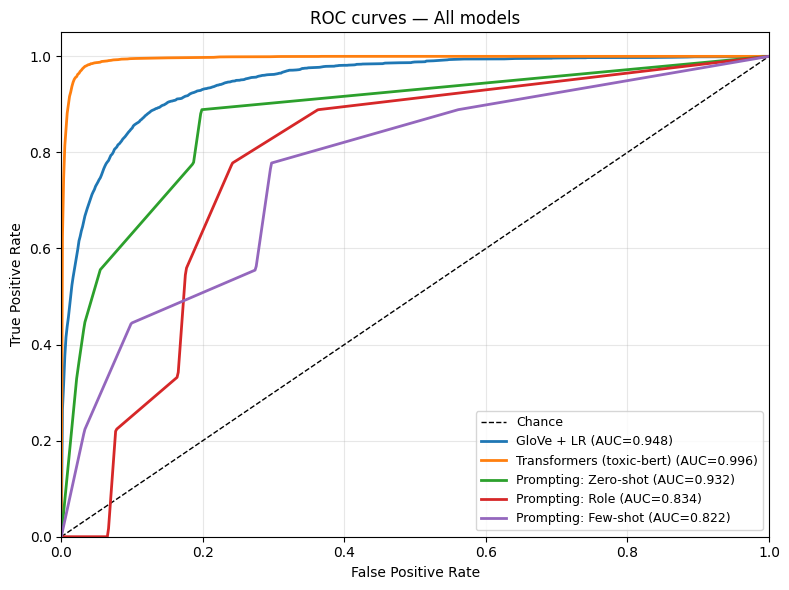

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def _align(y, s):
    y = np.asarray(y, dtype=int)
    s = np.asarray(s, dtype=float)
    mask = ~np.isnan(s)
    y, s = y[mask], s[mask]
    return y, s

def _plot_one(ax, name, y, s):
    if len(y) == 0 or len(s) == 0:
        print(f"[ROC] Skip {name}: y ou scores vides.")
        return False
    if len(y) != len(s):
        print(f"[ROC] Skip {name}: tailles non alignées (y={len(y)} vs s={len(s)}).")
        return False
    if len(np.unique(y)) < 2:
        print(f"[ROC] Skip {name}: y ne contient pas les deux classes.")
        return False
    fpr, tpr, _ = roc_curve(y, s)
    auc_val = auc(fpr, tpr)
    # Lissage visuel
    uniq = np.r_[True, np.diff(fpr) > 0]
    fpr_u, tpr_u = fpr[uniq], tpr[uniq]
    grid = np.linspace(0, 1, 600)
    tpr_s = np.interp(grid, fpr_u, tpr_u)
    ax.plot(grid, tpr_s, lw=2, label=f"{name} (AUC={auc_val:.3f})")
    return True

# 1) Récupérer y de référence pour chaque groupe
# - Embedding & Transformers utilisent y_test
# - Prompting utilise souvent y_true (df_sample). Si y_true n’existe pas, on essaie y_test.
vars_presentes = set(globals().keys())

y_emb_ref = globals().get("y_test", None)
y_hf_ref  = globals().get("y_test", None)
y_zsp_ref = globals().get("y_true", globals().get("y_test", None))
y_role_ref= globals().get("y_true", globals().get("y_test", None))
y_few_ref = globals().get("y_true", globals().get("y_test", None))

# 2) Récupérer les scores s’il existent (noms imposés)
# - Embedding
y_prob_embed = globals().get("y_prob_embed", globals().get("y_proba", None))
# - Transformers
y_score_hf   = globals().get("y_proba_transformers", globals().get("y_score", None))
# - Prompting
s_zero_scores = globals().get("y_proba_zero_shot", globals().get("s_zero", None))
s_role_scores = globals().get("y_proba_role_prompt", globals().get("s_role", None))
s_few_scores  = globals().get("y_proba_few_shot", globals().get("s_few", None))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot([0, 1], [0, 1], 'k--', lw=1, label='Chance')

n_plotted = 0

# Embedding (GloVe + LR)
if (y_emb_ref is not None) and (y_prob_embed is not None):
    y_a, s_a = _align(y_emb_ref, y_prob_embed)
    ok = _plot_one(ax, "GloVe + LR", y_a, s_a)
    n_plotted += int(ok)
else:
    print("[ROC] Embedding: variables manquantes (y_test ou y_prob_embed/y_proba).")

# Transformers
if (y_hf_ref is not None) and (y_score_hf is not None):
    y_a, s_a = _align(y_hf_ref, y_score_hf)
    ok = _plot_one(ax, "Transformers (toxic-bert)", y_a, s_a)
    n_plotted += int(ok)
else:
    print("[ROC] Transformers: variables manquantes (y_test ou y_score/y_proba_transformers).")

# Prompting: Zero-shot
if (y_zsp_ref is not None) and (s_zero_scores is not None):
    y_a, s_a = _align(y_zsp_ref, s_zero_scores)
    ok = _plot_one(ax, "Prompting: Zero-shot", y_a, s_a)
    n_plotted += int(ok)

# Prompting: Role
if (y_role_ref is not None) and (s_role_scores is not None):
    y_a, s_a = _align(y_role_ref, s_role_scores)
    ok = _plot_one(ax, "Prompting: Role", y_a, s_a)
    n_plotted += int(ok)

# Prompting: Few-shot
if (y_few_ref is not None) and (s_few_scores is not None):
    y_a, s_a = _align(y_few_ref, s_few_scores)
    ok = _plot_one(ax, "Prompting: Few-shot", y_a, s_a)
    n_plotted += int(ok)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1.05])
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC curves — All models")
ax.legend(loc="lower right", fontsize=9)
ax.grid(alpha=0.3)
plt.tight_layout()

if n_plotted == 0:
    print("[ROC] Aucun modèle tracé. Vérifie l’existence et l’alignement des variables.")
else:
    plt.show()